### Some simple problems

### Linear regresion

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
import numpy as np
torch.__version__


'2.4.0'

### Data creation

In [83]:
w = 0.3
b = 0.9

X = torch.arange(0, 1, 0.01).unsqueeze(1)
y = w * X + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [84]:
X.shape

torch.Size([100, 1])

### Train and test

In [85]:
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size= 0.2)
Xtv.shape, Xts.shape, ytv.shape, yts.shape

(torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

In [86]:
def plot_predictions(train_data=Xtv, 
                     train_labels=ytv, 
                     test_data=Xts, 
                     test_labels=yts, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

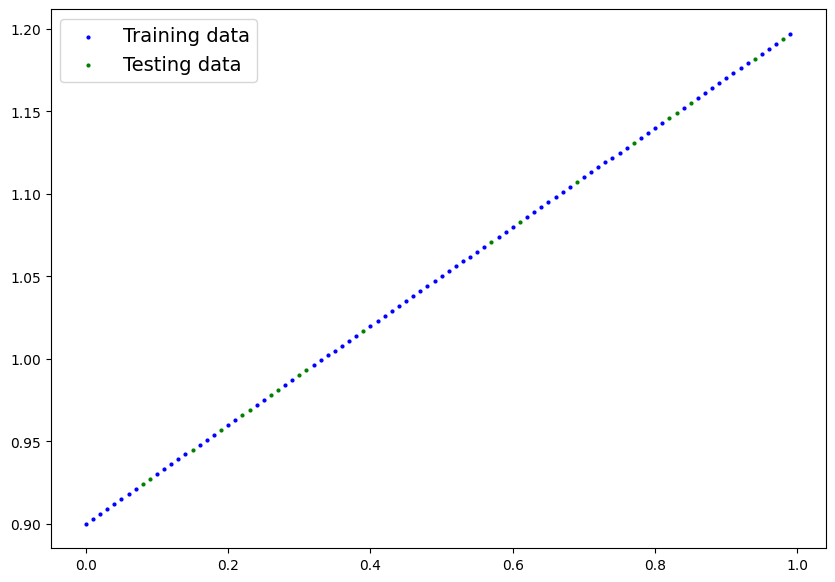

In [87]:
plot_predictions()

In [88]:
class LinearRegression(nn.Module): #Inheritance of the nn module
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #We create a simple linear regresion using weight: w and bias: b
        #The first parameters are random generated, and we stablish that they are float and we 
        #going to optimized with a gradient desent ecuation
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #This is like a linear regresion ecuation, we are going to change this 
            #values when the model is training 

        

In [89]:
torch.manual_seed(23)

model = LinearRegression()

list(model.parameters())

[Parameter containing:
 tensor([0.4283], requires_grad=True),
 Parameter containing:
 tensor([0.2889], requires_grad=True)]

Its just random numbers

In [90]:
with torch.inference_mode(): #Remember to use the inference mode to make it faster
    y_preds = model(Xts)

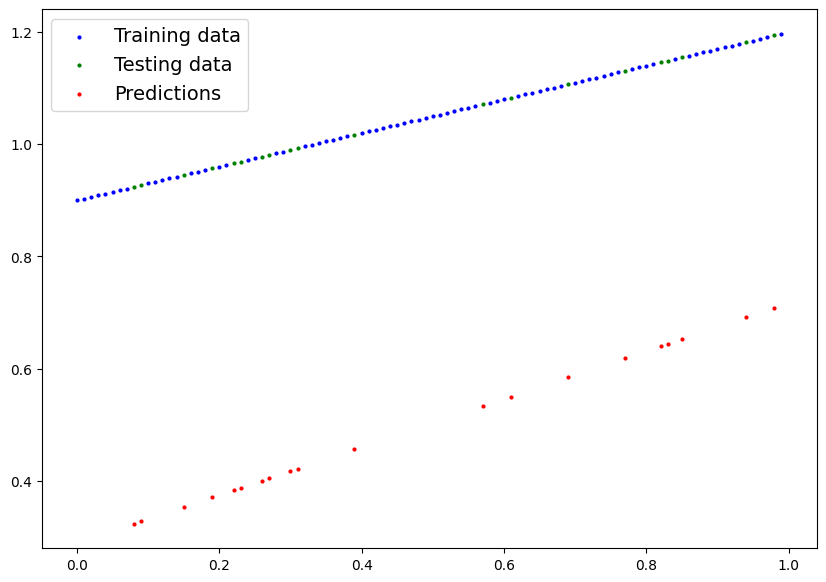

In [91]:
plot_predictions(predictions=y_preds)

It is doing his best :c

### The lost function

In [92]:
loss = nn.MSELoss() #This is the MSE refer to documentation to try other loss functions

optmizer = torch.optim.SGD(params=model.parameters(), lr=0.01) #The learning rate and in this case we are going to use a 
#stochastic gradient descent algorith 

### Testing loop

In [108]:
epochs = 300
def train_function(model, optmizer, epochs=epochs, Xtv=Xtv, ytv= ytv, Xts=Xts, yts=yts):
    for epoch in range(epochs):
        model.train() #We set it to train mode
        y_pred = model(Xtv) #Make the first predictions
        train_loss = loss(y_pred, ytv) #Calculate the loss function with the current state of the model
        optmizer.zero_grad() #Set the optimizer to 0, resenting the gradients
        train_loss.backward() #Pass the loss backwards
        optmizer.step() #Makes a step in the optimization Process as if a ball is falling a mountain 
        model.eval() #Put the model in evaluation mode to see how the train data is doing
        with torch.inference_mode():
            if epoch % 20 == 0:
                yts_pred = model(Xts)
                test_loss = loss(yts_pred, yts)
                print(f"Epoch {epoch} | Loss train {train_loss} | Loss test {test_loss}")


In [109]:
train_function(model, optmizer)

Epoch 0 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 20 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 40 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 60 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 80 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 100 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 120 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 140 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 160 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 180 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 200 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 220 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 240 | Loss train 0.006519783288240433 | Loss test 0.00753473024815321
Epoch 260 | Loss t

Lets se its parameters

In [110]:
list(model.parameters()) 

[Parameter containing:
 tensor([0.3267], requires_grad=True),
 Parameter containing:
 tensor([0.8857], requires_grad=True)]

A little close now *it was needed 3000 epochs to train the model*

In [111]:
model.eval() #Change the model set
with torch.inference_mode():
    y_pred = model(Xts)

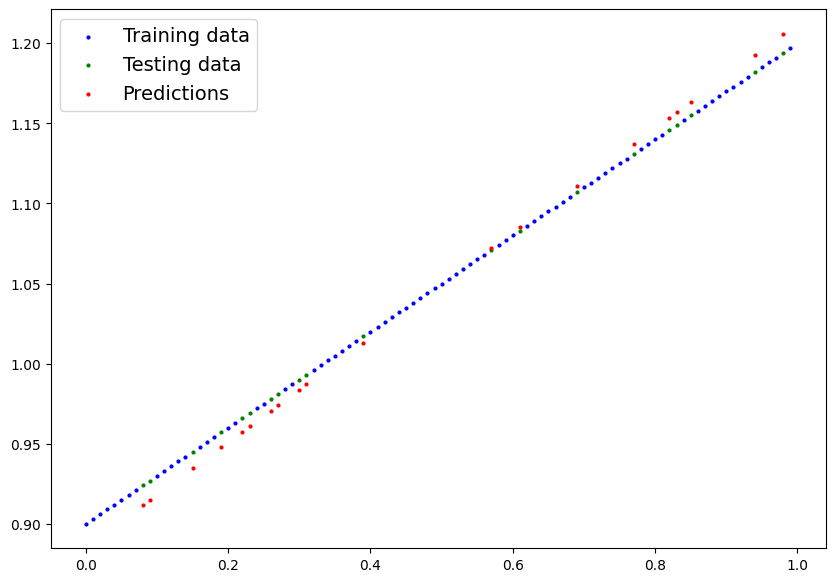

In [112]:
plot_predictions(predictions=y_pred)

To save it

In [113]:
torch.save(obj=model.state_dict(), f="../models/scratch_linear.pth")

To load it

In [114]:
model2 = LinearRegression() #we initialize the model
print(list(model.parameters()))

model2.load_state_dict(torch.load(f="../models/scratch_linear.pth"))
print(list(model.parameters()))


[Parameter containing:
tensor([0.3267], requires_grad=True), Parameter containing:
tensor([0.8857], requires_grad=True)]
[Parameter containing:
tensor([0.3267], requires_grad=True), Parameter containing:
tensor([0.8857], requires_grad=True)]


/tmp/ipykernel_14071/3540240041.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(f="../models/scratch_linear.pth"))


Using the LinearRegresion that has pytorch

In [115]:
class LinearRegression2(nn.Module): #Inheritance of the nn module
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x) #In this case we dont need to use a formula becouse it inherited from de Linear module

torch.manual_seed(23)
model_3 = LinearRegression2()

model_3, model_3.state_dict()


(LinearRegression2(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[-0.1435]])),
              ('linear.bias', tensor([-0.4223]))]))

In [116]:
device = "cuda" if torch.cuda.is_available() else "cpu" #To pass the data to the gpu if its available
device

'cpu'

In [117]:
model_3.to(device)

LinearRegression2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [118]:
loss = nn.L1Loss() #lets change the loss function
optmizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01) #Remember to do again the optimizer for the specific model

In [122]:
torch.manual_seed(23) #Remember to put the seed
epochs = 300

Xtv = Xtv.to(device)
ytv = ytv.to(device)
Xts = Xts.to(device)
yts = yts.to(device)

train_function(model_3, optmizer)

Epoch 0 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 20 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 40 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 60 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 80 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 100 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 120 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 140 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 160 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 180 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 200 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 220 | Loss train 0.0028172091115266085 | Loss test 0.009448662400245667
Epoch 240 | Loss train 0.0028172091115266085 | Loss test 0.00944866240

In [120]:
list(model_3.parameters())

[Parameter containing:
 tensor([[0.3054]], requires_grad=True),
 Parameter containing:
 tensor([0.8945], requires_grad=True)]

So close 

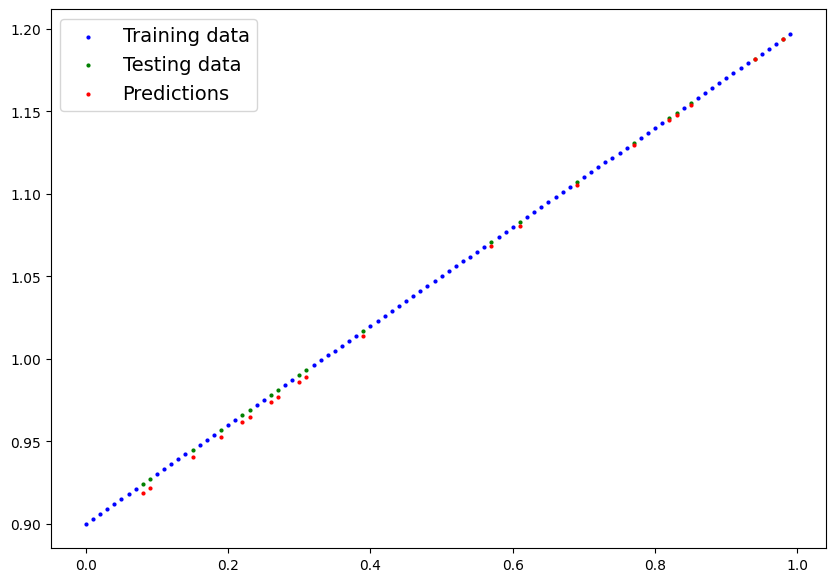

In [123]:
with torch.inference_mode():
    y_pred = model_3(Xts)

plot_predictions(predictions=y_pred)